In [1]:
from utils import HOG_descriptor, find_ped_img_idx, built_codebook
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import tqdm
import time
import pickle

%matplotlib inline

In [2]:
img_ped_idx = find_ped_img_idx()
hog_features = []
for idx in tqdm.tqdm(img_ped_idx):
    img_name = str(idx)
    if len(img_name)==1:
        img_name = '00'+img_name+'.jpg'
    elif len(img_name)==2:
        img_name = '0'+img_name+'.jpg'
    elif len(img_name)==3:
        img_name = img_name+'.jpg'
    img_path = './img1/' + img_name
    
    img = cv.imread(img_path)
    fd, hog_img = HOG_descriptor(img)
    h, w, ch = fd.shape
    fd = np.reshape(fd, (h*w, ch))
    hog_features += [fd]
hog_features = np.concatenate(hog_features, axis=0)

start = time.time()
kmeans_hog = built_codebook(hog_features)
end = time.time()
print('Time: ', end-start)
print('score: ', -kmeans_hog.score(hog_features))

np.save('./Models/hog_features.npy', hog_features)
np.save('./Models/hog_codebook.npy', kmeans_hog.cluster_centers_)
pickle.dump(kmeans_hog, open('./Models/kmeans_hog.sav', 'wb'))

# Load
# loaded_model = pickle.load(open(filename, 'rb'))

100%|████████████████████████████████████████████████████████████████████████████████| 402/402 [05:42<00:00,  1.19it/s]


Time:  10.52544116973877
score:  163097.5484682125


In [3]:
print(hog_features.shape)

(1651416, 24)


D:\Tsou\Anaconda\envs\opencv\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Tsou\Anaconda\envs\opencv\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


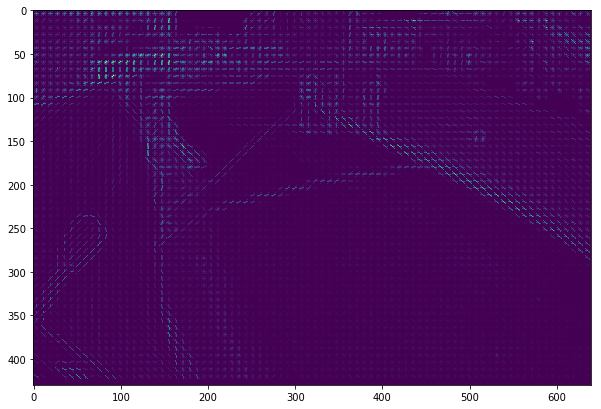

0.042718829959630965


In [71]:
img_curr = cv.imread('./img1/300.jpg')
img_curr = resize(img_curr, output_shape=(430, 640))
img_next = cv.imread('./img1/004.jpg')



fd, hog_image = HOG_descriptor(img_curr)


tmp = exposure.rescale_intensity(hog_image, in_range=(0, 10))
#tmp = exposure.rescale_intensity(hog_image)
#tmp = hog_image
plt.figure(figsize=(10, 10))
plt.imshow(tmp)
plt.show()
print(np.max(tmp))

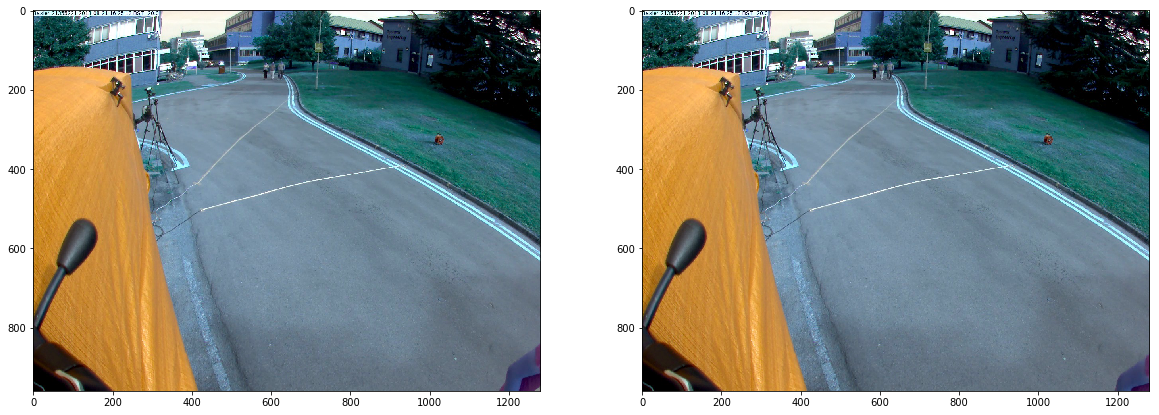

In [2]:
img_curr = cv.imread('./img1/003.jpg')
img_next = cv.imread('./img1/004.jpg')

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].imshow(img_curr)
ax[1].imshow(img_next)
plt.show()

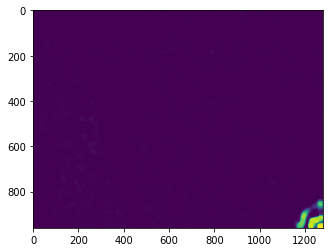

In [75]:
img_curr_gray = cv.cvtColor(img_curr, cv.COLOR_RGB2GRAY)
img_next_gray = cv.cvtColor(img_next, cv.COLOR_RGB2GRAY)
flow = cv.calcOpticalFlowFarneback(img_curr_gray, img_next_gray, None, 0.5, 4, 20, 3, 15, 1.2, 0)

mag, ang = cv.cartToPolar(flow[:, :, 0], flow[:, :, 1])
hsv = np.zeros(img_curr.shape)
hsv[:, :,0] = ang*180/np.pi/2
hsv[:, :,1] = 255
hsv[:, :,2] = cv.normalize(mag, None, 0, 255, cv.NORM_MINMAX)
hsv = hsv.astype(np.uint8)
bgr = cv.cvtColor(hsv, cv.COLOR_HSV2RGB)
bgr = cv.cvtColor(bgr, cv.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(bgr)
plt.show()

In [ ]:
# Key words: human detection, object tracking

In [ ]:
import cv2
import time

hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
cap = cv2.VideoCapture("/path/to/test/video")
while True:
    r, frame = cap.read()
    if r:
        start_time = time.time()
        frame = cv2.resize(frame,(1280, 720)) # Downscale to improve frame rate
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY) # HOG needs a grayscale image

        rects, weights = hog.detectMultiScale(gray_frame)
        
        # Measure elapsed time for detections
        end_time = time.time()
        print("Elapsed time:", end_time-start_time)
        
        for i, (x, y, w, h) in enumerate(rects):
            if weights[i] < 0.7:
                continue
            cv2.rectangle(frame, (x,y), (x+w,y+h),(0,255,0),2)

        cv2.imshow("preview", frame)
    k = cv2.waitKey(1)
    if k & 0xFF == ord("q"): # Exit condition
        break